# Data Description

Netflix is a popular entertainment service platform used by people around the world. In this EDA we will explore the netflix data set through visualization and graph using python libraries, matplotlib and seaborn.We used TV shows and movies listed on the Netflix data set from Kaggle. The data set consists of TV shows and movies available on Netflix as of 2021. The objective is to find out, how the rating of different TV programms, the best director, best actor, number of releases in each year and the sentiment of the viewers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d=pd.read_csv("C:\\Users\\ANEEJA SK\\Desktop\\R practical S2\\EXL\\joyan.csv");d

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
d.shape


(8807, 12)

In [3]:
d.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
z=d.groupby(by=["rating"]).size();z

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64

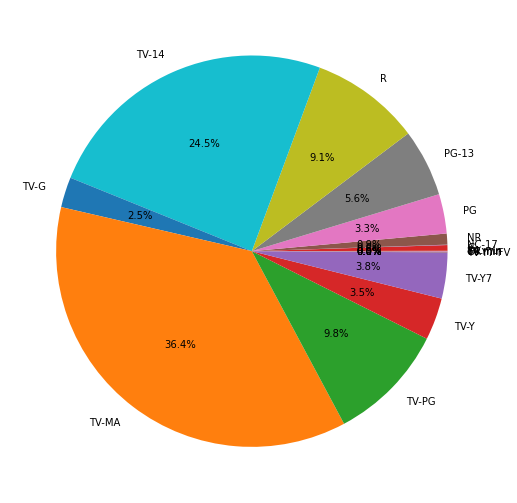

In [5]:
plt.figure(figsize=(12,9))
plt.pie(z,labels=z.keys(),autopct="%0.1f%%")
plt.show()

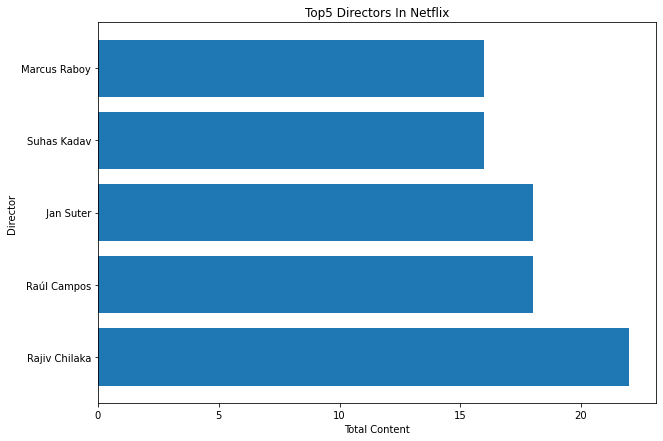

In [6]:
d["director"]=d["director"].fillna("No Director Specified")

directors=[]
df=d["director"].str.split(",")
for index in range(len(df)):
    directors.extend(df[index])
directors=pd.Series(directors)
series=directors.value_counts()
directorTop5=series[series.keys()!="No Director Specified"][:5]


plt.figure(figsize=(10,7))
plt.barh(directorTop5.keys(),directorTop5)
plt.xlabel("Total Content")
plt.ylabel("Director")
plt.title("Top5 Directors In Netflix")
plt.show()


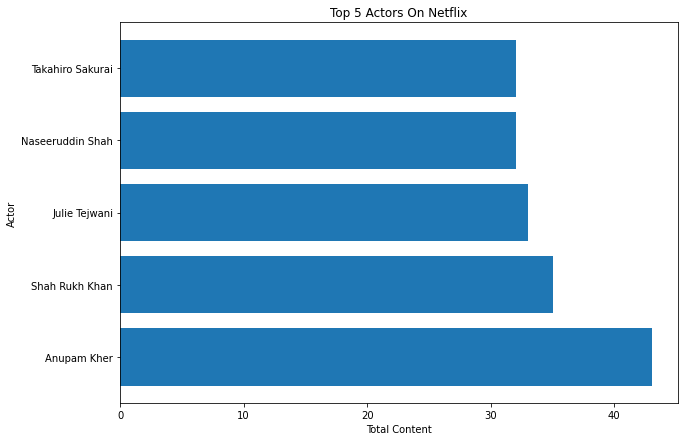

In [16]:
d["cast"]=d["cast"].fillna("No Cast Specified")

actors=[]
df=d["cast"].str.split(", ")
for index in range(len(df)):
    actors.extend(df[index])
actors=pd.Series(actors)
series=actors.value_counts()
actorTop5=series[series.keys()!="No Cast Specified"][:5]


plt.figure(figsize=(10,7))
plt.barh(actorTop5.keys(),actorTop5)
plt.xlabel("Total Content")
plt.ylabel("Actor")
plt.title("Top 5 Actors On Netflix")
plt.show()


In [8]:
d1=d.loc[:,["type","release_year"]]
d1=d1.rename(columns={"release_year":"Release Year"})
d2=d1.groupby(["Release Year","type"]).size().reset_index(name="Total Content")
d2=d2.loc[d2["Release Year"]>=2010]
d2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


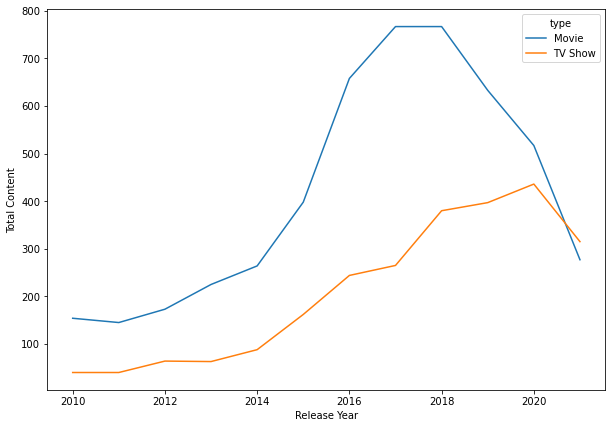

In [9]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.lineplot(data=d2,x="Release Year",y="Total Content",hue="type")
plt.show()

In [10]:
from textblob import TextBlob

In [14]:
d3=d.loc[:,['release_year','description']]
d3=d3.rename(columns={'release_year':'Release Year'})

for i in range(len(d3)):
    z=d3.loc[i,'description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity

    if p==0:    sent='Neutral'
    elif p>0:   sent='Positive'
    else:   sent='Negative'

    d3.loc[i,'Sentiment']=sent

d3 = d3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Content')
d3 = d3.loc[d3['Release Year']>=2010]
d3

,Release Year,Sentiment,Total Content
149,2010,Negative,53
150,2010,Neutral,40
151,2010,Positive,101
152,2011,Negative,46
153,2011,Neutral,33
154,2011,Positive,106
155,2012,Negative,73
156,2012,Neutral,39
157,2012,Positive,125
158,2013,Negative,93


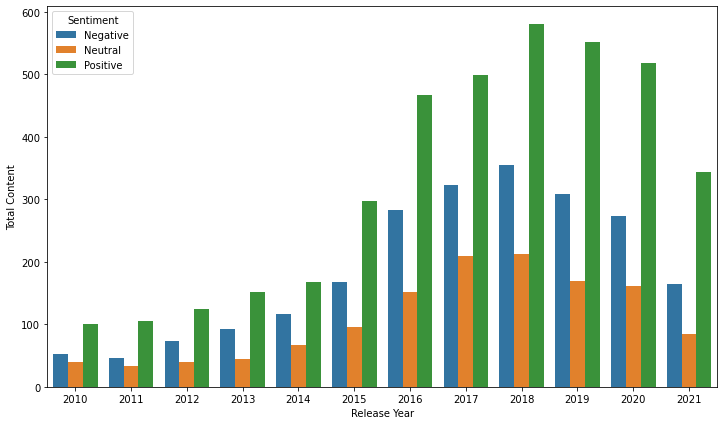

In [16]:
plt.figure(figsize=(12,7))
sns.barplot(data=d3,x="Release Year",y="Total Content",hue="Sentiment")
plt.show()
